<a href="https://colab.research.google.com/github/udoyroy98/Motor_Fault_Detection_ML/blob/main/ANN_motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as snNew
import pandas as pdNew
import matplotlib.pyplot as pltNew

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/0-5train.csv')

In [ ]:
data.sample(11)

,Time,Isa,Isb,Isc,Ira,Irb,Irc,Speed,Torque,Target
109727,1.828569,-2.200794,2.151504,0.049290,-0.003496,0.041565,-0.038069,1498.922981,-4.491700e-10,0
77734,1.295369,5.437051,-15.125909,9.688858,-10.866078,10.162317,0.703761,1508.662657,-2.111990e+01,2
239786,3.996219,0.810931,-2.465621,1.654690,-0.042112,0.004793,0.037319,1498.922981,9.040440e-12,0
204167,3.402569,1.834393,0.570654,-2.405047,0.038229,-0.041441,0.003212,1498.922981,6.413090e-12,0
45721,0.761819,4.514149,-7.828303,3.314154,-6.816911,0.450531,6.366380,1486.013461,2.334501e+01,2
8631,0.143669,21.556514,5.202002,-26.758516,-19.185917,25.317817,-6.131900,825.125952,3.824795e+01,1
209829,3.496969,7.587579,-2.623214,-4.964365,-1.458051,6.303677,-4.845626,1488.776083,-3.130474e+01,1
34030,0.566969,-7.650426,2.554180,5.096246,-5.811560,5.809543,0.002017,1488.573177,-3.132056e+01,2
17319,0.288469,5.816248,-9.357458,3.541210,11.077665,-4.195611,-6.882054,1478.933947,-8.463121e+00,1
236810,3.946619,-1.102687,2.507234,-1.404547,0.039156,0.001508,-0.040664,1498.922981,8.635870e-12,0


In [ ]:
data.shape

(300012, 10)

In [ ]:
data['Target'].value_counts()

1    100004
2    100004
0    100004
Name: Target, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


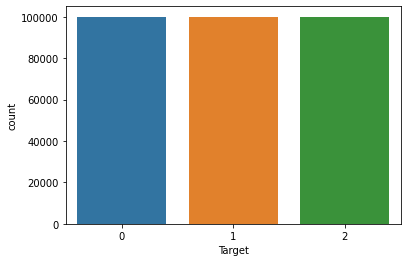

In [ ]:
sns.countplot(data['Target'])

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.describe()

,Time,Isa,Isb,Isc,Ira,Irb,Irc,Speed,Torque,Target
count,3.000120e+05,300012.000000,300012.000000,300012.000000,300012.000000,300012.000000,300012.000000,3.000120e+05,3.000120e+05,300012.000000
mean,2.499894e+00,0.001367,0.006571,-0.007938,-0.103099,0.018058,0.085041,1.459362e+03,7.326394e-01,1.000000
std,1.443436e+00,6.737819,7.229524,7.596341,6.631629,6.558251,6.562115,1.827836e+02,1.748545e+01,0.816498
min,1.210510e-07,-27.658529,-26.437518,-33.326736,-31.333782,-30.540275,-29.323605,2.939080e-17,-3.481414e+01,0.000000
25%,1.249857e+00,-4.295934,-4.240448,-4.173870,-4.183249,-3.972068,-3.882077,1.480223e+03,-5.251915e+00,0.000000
50%,2.499894e+00,0.003345,-0.016504,0.001498,-0.001571,0.000495,0.001304,1.498923e+03,8.103355e-12,1.000000
75%,3.749932e+00,4.351676,4.240448,4.161317,3.906174,4.074376,4.098265,1.498923e+03,1.081576e+01,2.000000
max,4.999969e+00,27.492168,26.050281,33.508201,29.132459,29.611167,31.474683,1.517157e+03,7.024411e+01,2.000000


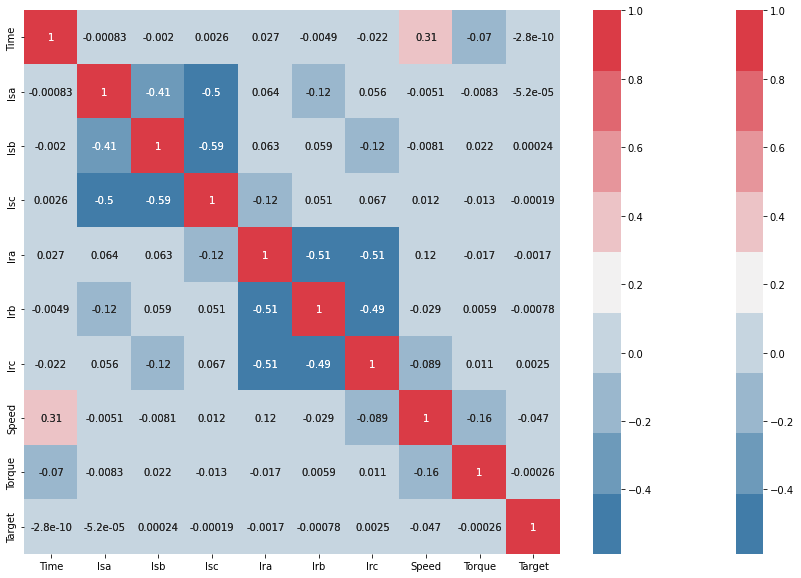

In [ ]:
#correlation matrix
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
annot=True, cmap=sns.diverging_palette(240, 10, n=9))
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns,
annot=True,
cmap=sns.diverging_palette(240, 10, n=9))

In [ ]:
x = data.iloc[:,:-1]

In [ ]:
x

,Time,Isa,Isb,Isc,Ira,Irb,Irc,Speed,Torque
0,1.210510e-07,8.139850e-08,-0.000746,0.000746,-4.584210e-08,0.000704,-0.000704,8.718750e-17,7.112230e-12
1,1.210510e-07,8.085220e-08,-0.000746,0.000746,-4.532700e-08,0.000704,-0.000704,8.620780e-17,7.032320e-12
2,1.210550e-07,4.916830e-08,-0.000746,0.000746,-1.545280e-08,0.000704,-0.000704,2.939080e-17,2.397450e-12
3,2.421030e-07,3.255910e-07,-0.001493,0.001493,-1.833670e-07,0.001408,-0.001407,1.394990e-15,5.689750e-11
4,2.421030e-07,3.234060e-07,-0.001493,0.001493,-1.813060e-07,0.001408,-0.001407,1.379320e-15,5.625820e-11
...,...,...,...,...,...,...,...,...,...
300007,4.999919e+00,-1.147172e+01,3.708418,7.763305,1.321245e+01,-5.866198,-7.346256,1.476197e+03,4.922243e+00
300008,4.999919e+00,2.505272e+00,-1.426295,-1.078977,-9.853263e-03,-0.034083,0.043936,1.498923e+03,7.489790e-12
300009,4.999969e+00,-1.140778e+01,3.347127,8.060657,-2.901545e+00,12.676500,-9.774955,1.476485e+03,5.269457e+00
300010,4.999969e+00,-1.132840e+01,3.287408,8.040992,1.311437e+01,-5.449751,-7.664618,1.476299e+03,5.208763e+00


In [ ]:
y = data.iloc[:,9]

In [ ]:
y

0         1
1         2
2         0
3         1
4         2
         ..
300007    2
300008    0
300009    1
300010    2
300011    0
Name: Target, Length: 300012, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25 , random_state=10)

In [ ]:
xtrain

,Time,Isa,Isb,Isc,Ira,Irb,Irc,Speed,Torque
53223,0.886869,-8.121458,3.745556,4.375903,-6.568722,2.024042,4.544680,1490.064445,-3.227787e+01
280052,4.667319,-1.568801,2.484870,-0.916069,0.037696,0.004147,-0.041843,1498.922981,9.378940e-12
139243,2.320519,-8.308199,-1.502413,9.810612,9.189892,-11.179561,1.989670,1477.841368,8.826019e+00
251582,4.192819,-1.693944,-0.760934,2.454878,-0.035472,0.043247,-0.007775,1498.922981,6.907140e-12
267268,4.454269,-4.901083,-11.169165,16.070247,-7.812006,13.210876,-5.398870,1511.396487,9.565536e+00
...,...,...,...,...,...,...,...,...,...
299741,4.995469,0.233191,-2.283774,2.050583,-0.046069,0.024694,0.021375,1498.922981,8.503980e-12
9372,0.156019,2.900769,-19.986235,17.085466,2.461068,-17.898530,15.437463,905.257231,-5.190014e+00
105595,1.759719,-11.806425,5.310527,6.495898,13.223988,-8.493969,-4.730019,1475.844314,3.776863e+00
93553,1.559019,-9.985155,9.135854,0.849300,12.427000,-8.758200,-3.668801,1475.435653,-1.337373e+00


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(xtrain)
x_train = scaler.transform(xtrain)
x_test = scaler.transform(xtest)

In [ ]:
x_train

array([[-1.11972742, -1.20549237,  0.51801773, ...,  0.6798469 ,
         0.16699172, -1.88782562],
       [ 1.4997215 , -0.2331272 ,  0.34374222, ..., -0.01897122,
         0.21568168, -0.04339721],
       [-0.12636077, -1.23320327, -0.20745419, ...,  0.29055692,
         0.09980893,  0.460941  ],
       ...,
       [-0.5149354 , -1.75231377,  0.73435718, ..., -0.73327758,
         0.08883234,  0.17242106],
       [-0.65399911, -1.48205091,  1.26316514, ..., -0.57158673,
         0.08658618, -0.11981766],
       [ 0.99872492,  0.10419799,  0.24037666, ..., -0.01495304,
         0.21568168, -0.04339721]])

In [ ]:
x_test

array([[-1.01749099, -0.51882515, -1.70308669, ..., -0.16662114,
         0.28673911,  0.26312699],
       [-0.82361942, -0.79466453, -1.48611143, ..., -1.37291864,
         0.28310041,  0.58060523],
       [-0.2496958 ,  0.27585208,  0.07379922, ..., -0.01398336,
         0.21568168, -0.04339721],
       ...,
       [-0.68417462,  0.9192545 , -2.06076753, ..., -0.52948928,
         0.26425692, -1.37976587],
       [ 0.62497821, -0.13872731,  2.0336595 , ..., -1.86459243,
         0.28554781, -0.48735786],
       [-0.70790621,  0.35267637, -0.06710486, ..., -0.01217157,
         0.21568169, -0.04339721]])

Feature rating

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(xtrain,ytrain)
mutual_info

array([0.        , 0.97890305, 0.98250737, 0.98336324, 0.56018311,
       0.5604162 , 0.55909782, 1.01675654, 1.01003445])

In [ ]:
mutual_info= pd.Series(mutual_info)
mutual_info.index=xtrain.columns
mutual_info.sort_values(ascending=False)

Speed     1.016757
Torque    1.010034
Isc       0.983363
Isb       0.982507
Isa       0.978903
Irb       0.560416
Ira       0.560183
Irc       0.559098
Time      0.000000
dtype: float64

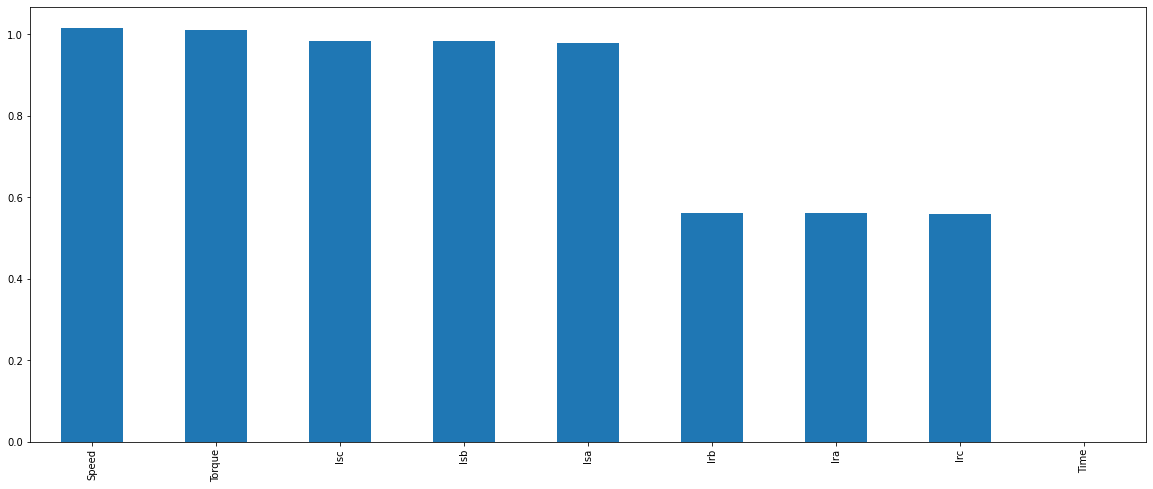

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam ,SGD
from tensorflow.keras.utils import to_categorical


In [ ]:
y_train = to_categorical(ytrain, 3)
y_test = to_categorical(ytest, 3)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(128,input_dim=9,kernel_initializer='normal',activation='relu'))#input layer
model.add(Dropout(0.5))
model.add(Dense(160,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(125,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(75,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))#output layer


In [ ]:
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 160)               20640     
                                                                 
 dropout_1 (Dropout)         (None, 160)               0         
                                                                 
 dense_2 (Dense)             (None, 125)               20125     
                                                                 
 dropout_2 (Dropout)         (None, 125)               0         
                                                                 
 dense_3 (Dense)             (None, 75)                9

In [ ]:
model.fit(x_train,y_train,validation_split=0.2,epochs=30)

Epoch 1/30
5626/5626 [==============================] - 37s 6ms/step - loss: 0.4992 - accuracy: 0.6568 - val_loss: 0.4815 - val_accuracy: 0.6577
Epoch 2/30
5626/5626 [==============================] - 21s 4ms/step - loss: 0.4851 - accuracy: 0.6587 - val_loss: 0.4796 - val_accuracy: 0.6611
Epoch 3/30
5626/5626 [==============================] - 19s 3ms/step - loss: 0.4838 - accuracy: 0.6622 - val_loss: 0.4792 - val_accuracy: 0.6658
Epoch 4/30
5626/5626 [==============================] - 19s 3ms/step - loss: 0.4814 - accuracy: 0.6704 - val_loss: 0.4721 - val_accuracy: 0.7029
Epoch 5/30
5626/5626 [==============================] - 21s 4ms/step - loss: 0.4799 - accuracy: 0.6830 - val_loss: 0.4688 - val_accuracy: 0.7213
Epoch 6/30
5626/5626 [==============================] - 20s 4ms/step - loss: 0.4772 - accuracy: 0.6942 - val_loss: 0.4659 - val_accuracy: 0.7217
Epoch 7/30
5626/5626 [==============================] - 20s 4ms/step - loss: 0.4746 - accuracy: 0.7017 - val_loss: 0.4634 - val_ac

In [ ]:
y_pred = model.predict(x_test)
ytest_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

2344/2344 [==============================] - 3s 1ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     25283
           1       0.99      0.96      0.97     24790
           2       0.98      0.97      0.98     24930

    accuracy                           0.98     75003
   macro avg       0.98      0.98      0.98     75003
weighted avg       0.98      0.98      0.98     75003



In [ ]:
from sklearn.metrics import roc_curve,auc
predict_prob=model.predict(x_test)
predict_prob.shape


2344/2344 [==============================] - 3s 1ms/step


(75003, 3)

In [ ]:
from sklearn.preprocessing import label_binarize
classes = np.unique(ytest)
ytest_binarized = label_binarize(ytest,classes = np.unique(ytest))

In [ ]:
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()
n_class = classes.shape[0]
for i in range(n_class):
  fpr[i],tpr[i],thresh[i] = roc_curve(ytest_binarized[:,i],predict_prob[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])

<ipython-input-59-7a52747d5598>:11: MatplotlibDeprecationWarning: Unrecognized location 'Lower right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc = 'Lower right')


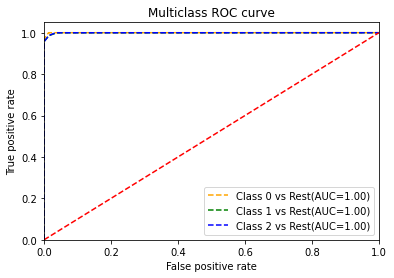

In [ ]:
#plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest(AUC=%0.2f)'%(roc_auc[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest(AUC=%0.2f)'%(roc_auc[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest(AUC=%0.2f)'%(roc_auc[2]))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc = 'Lower right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(ytest_class,y_pred_class)
c_mat

array([[25282,     0,     1],
       [  378, 23776,   636],
       [  375,    30, 24525]])

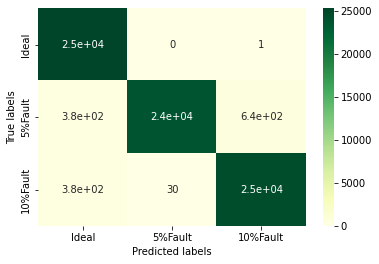

In [ ]:
ax= plt.subplot()
confusion_matrix = pdNew.DataFrame(c_mat, range(3), range(3))
snNew.heatmap(confusion_matrix, annot=True ,cmap="YlGn", ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.xaxis.set_ticklabels(['Ideal', '5%Fault','10%Fault']); ax.yaxis.set_ticklabels(['Ideal', '5%Fault','10%Fault']);